In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import table

In [2]:
data = pd.read_excel(r'D:\Code\py_code\Multi-Layer-Perceptron\data\BA_AirlineReviews_CL_excel.xlsx',header=0)

data.head()

id       Satisfaction                              ReviewHeader   
0   0  Very Dissatisfied    "Service level far worse then Ryanair"  \
1   1            Neutral  "do not upgrade members based on status"   
2   2       Enthusiastic             "Flight was smooth and quick"   
3   3  Very Dissatisfied             "Absolutely hopeless airline"   
4   4  Very Dissatisfied        "Customer Service is non existent"   

               Name            Datetime  VerifiedReview   
0           L Keele  19th November 2023            True  \
1      Austin Jones  19th November 2023            True   
2        M A Collie  16th November 2023           False   
3        Nigel Dean  16th November 2023            True   
4  Gaylynne Simpson  14th November 2023           False   

                                          ReviewBody TypeOfTraveller   
0  4 Hours before takeoff we received a Mail stat...  Couple Leisure  \
1  I recently had a delay on British Airways from...        Business   
2  Boarded on time, but it took ages to get to th...  Couple Leisure   
3  5 days before the flight, we were advised by B...  Couple Leisure   
4  We traveled to Lisbon for our dream vacation, ...  Couple Leisure   

         SeatType                      Route  DateFlown  SeatComfort   
0   Economy Class        London to Stuttgart 2023-11-01          1.0  \
1   Economy Class         Brussels to London 2023-11-01          2.0   
2  Business Class  London Heathrow to Dublin 2023-11-01          3.0   
3   Economy Class           London to Dublin 2022-12-01          3.0   
4   Economy Class           London to Lisbon 2023-11-01          1.0   

   CabinStaffService  GroundService  ValueForMoney Recommended Aircraft   
0                1.0            1.0            1.0          no      NaN  \
1                3.0            1.0            2.0          no     A320   
2                3.0            4.0            3.0         yes     A320   
3                3.0            1.0            1.0          no      NaN   
4                1.0            1.0            1.0          no      NaN   

   Food&Beverages  InflightEntertainment  Wifi&Connectivity  
0             NaN                    NaN                NaN  
1             1.0                    2.0                2.0  
2             4.0                    NaN                NaN  
3             NaN                    NaN                NaN  
4             1.0                    1.0                1.0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3701 non-null   int64         
 1   Satisfaction           3701 non-null   object        
 2   ReviewHeader           3701 non-null   object        
 3   Name                   3701 non-null   object        
 4   Datetime               3701 non-null   object        
 5   VerifiedReview         3701 non-null   bool          
 6   ReviewBody             3701 non-null   object        
 7   TypeOfTraveller        2930 non-null   object        
 8   SeatType               3699 non-null   object        
 9   Route                  2926 non-null   object        
 10  DateFlown              2923 non-null   datetime64[ns]
 11  SeatComfort            3585 non-null   float64       
 12  CabinStaffService      3574 non-null   float64       
 13  Gro

In [4]:
from sklearn.impute import KNNImputer

numeric_missing_col = data.columns[(data.isnull().any()) & (data.dtypes != 'object')].to_list()

impNumeric = KNNImputer(n_neighbors=5)
for col in numeric_missing_col:
    numeric = data[[col]].values
    impNumeric = impNumeric.fit(numeric)
    numeric = impNumeric.transform(numeric)
    numeric = numeric.round()
    data[col] = numeric

data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                   0
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity           0
dtype: int64

In [5]:
nominal_missing_col = data.columns[(data.isnull().any()) & (data.dtypes == 'object')].to_list()
for col in nominal_missing_col:
    data[col].fillna("Unknown", inplace=True)

data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
categorical_col = ['TypeOfTraveller', 'SeatType']
for col in categorical_col:
    encoded_data = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop([col], axis=1)

lbenc = LabelEncoder()
for i in data.columns.values:
    if (data[i].dtypes == "object" or data[i].dtypes == "bool") and i != "Satisfaction":
        data[i] = lbenc.fit_transform(data[i].astype(str))

satisfaction_order = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral",
    "Satisfied",
    "Very Satisfied",
    "Enthusiastic",
    "Extremely Satisfied",
    "Delighted",
    "Evangelist",
    "Advocate"
]

ordinal_enc = OrdinalEncoder(categories=[satisfaction_order])
data["Satisfaction"] = ordinal_enc.fit_transform(data[["Satisfaction"]])

data.head()

id  Satisfaction  ReviewHeader  Name  Datetime  VerifiedReview  ReviewBody   
0   0           0.0           483  1590       595               1          25  \
1   1           2.0          1128   254       595               1        1649   
2   2           5.0           264  1660       406               0         372   
3   3           0.0            37  2009       406               1          28   
4   4           0.0           222  1013       295               0        3603   

   Route     DateFlown  SeatComfort  ...  TypeOfTraveller_Business   
0   1044  1.698797e+18          1.0  ...                       0.0  \
1    143  1.698797e+18          2.0  ...                       1.0   
2    824  1.698797e+18          3.0  ...                       0.0   
3    946  1.669853e+18          3.0  ...                       0.0   
4    976  1.698797e+18          1.0  ...                       0.0   

   TypeOfTraveller_Couple Leisure  TypeOfTraveller_Family Leisure   
0                             1.0                             0.0  \
1                             0.0                             0.0   
2                             1.0                             0.0   
3                             1.0                             0.0   
4                             1.0                             0.0   

   TypeOfTraveller_Solo Leisure  TypeOfTraveller_Unknown   
0                           0.0                      0.0  \
1                           0.0                      0.0   
2                           0.0                      0.0   
3                           0.0                      0.0   
4                           0.0                      0.0   

   SeatType_Business Class  SeatType_Economy Class  SeatType_First Class   
0                      0.0                     1.0                   0.0  \
1                      0.0                     1.0                   0.0   
2                      1.0                     0.0                   0.0   
3                      0.0                     1.0                   0.0   
4                      0.0                     1.0                   0.0   

   SeatType_Premium Economy  SeatType_Unknown  
0                       0.0               0.0  
1                       0.0               0.0  
2                       0.0               0.0  
3                       0.0               0.0  
4                       0.0               0.0  

[5 rows x 28 columns]

In [7]:
data.describe()

id  Satisfaction  ReviewHeader         Name     Datetime   
count  3701.000000   3701.000000   3701.000000  3701.000000  3701.000000  \
mean   1850.000000      3.627668   1665.487166  1396.319643   905.066739   
std    1068.531001      3.094761    869.403991   838.782534   527.062164   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%     925.000000      1.000000    897.000000   655.000000   457.000000   
50%    1850.000000      3.000000   1804.000000  1354.000000   888.000000   
75%    2775.000000      6.000000   2609.000000  2136.000000  1373.000000   
max    3700.000000      9.000000   2684.000000  2901.000000  1819.000000   

       VerifiedReview   ReviewBody        Route     DateFlown  SeatComfort   
count     3701.000000  3701.000000  3701.000000  3.701000e+03  3701.000000  \
mean         0.311537  1845.307755   924.593083 -7.329317e+17     2.879222   
std          0.463184  1065.214398   468.600891  4.381454e+18     1.340735   
min          0.000000     0.000000     0.000000 -9.223372e+18     1.000000   
25%          0.000000   923.000000   563.000000  1.438387e+18     2.000000   
50%          0.000000  1847.000000   962.000000  1.483229e+18     3.000000   
75%          1.000000  2767.000000  1454.000000  1.551398e+18     4.000000   
max          1.000000  3691.000000  1542.000000  1.698797e+18     5.000000   

       ...  TypeOfTraveller_Business  TypeOfTraveller_Couple Leisure   
count  ...               3701.000000                     3701.000000  \
mean   ...                  0.173196                        0.270197   
std    ...                  0.378468                        0.444122   
min    ...                  0.000000                        0.000000   
25%    ...                  0.000000                        0.000000   
50%    ...                  0.000000                        0.000000   
75%    ...                  0.000000                        1.000000   
max    ...                  1.000000                        1.000000   

       TypeOfTraveller_Family Leisure  TypeOfTraveller_Solo Leisure   
count                     3701.000000                   3701.000000  \
mean                         0.107539                      0.240746   
std                          0.309839                      0.427594   
min                          0.000000                      0.000000   
25%                          0.000000                      0.000000   
50%                          0.000000                      0.000000   
75%                          0.000000                      0.000000   
max                          1.000000                      1.000000   

       TypeOfTraveller_Unknown  SeatType_Business Class   
count              3701.000000              3701.000000  \
mean                  0.208322                 0.323696   
std                   0.406163                 0.467949   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 1.000000   
max                   1.000000                 1.000000   

       SeatType_Economy Class  SeatType_First Class  SeatType_Premium Economy   
count              3701.00000           3701.000000               3701.000000  \
mean                  0.52067              0.057552                  0.097541   
std                   0.49964              0.232926                  0.296733   
min                   0.00000              0.000000                  0.000000   
25%                   0.00000              0.000000                  0.000000   
50%                   1.00000              0.000000                  0.000000   
75%                   1.00000              0.000000                  0.000000   
max                   1.00000              1.000000                  1.000000   

       SeatType_Unknown  
count       3701.000000  
mean           0.000540  

In [8]:
data.drop(['id', 'Name', 'ReviewHeader', 'ReviewBody', 'Route', 'Aircraft', 'DateFlown', 'Datetime'], inplace=True, axis = 1)
data.columns.to_list()

['Satisfaction',
 'VerifiedReview',
 'SeatComfort',
 'CabinStaffService',
 'GroundService',
 'ValueForMoney',
 'Recommended',
 'Food&Beverages',
 'InflightEntertainment',
 'Wifi&Connectivity',
 'TypeOfTraveller_Business',
 'TypeOfTraveller_Couple Leisure',
 'TypeOfTraveller_Family Leisure',
 'TypeOfTraveller_Solo Leisure',
 'TypeOfTraveller_Unknown',
 'SeatType_Business Class',
 'SeatType_Economy Class',
 'SeatType_First Class',
 'SeatType_Premium Economy',
 'SeatType_Unknown']

In [9]:
from sklearn.model_selection import train_test_split

features = data.drop(['Recommended'], axis=1)
label = data['Recommended']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=42, stratify=label, shuffle=True)

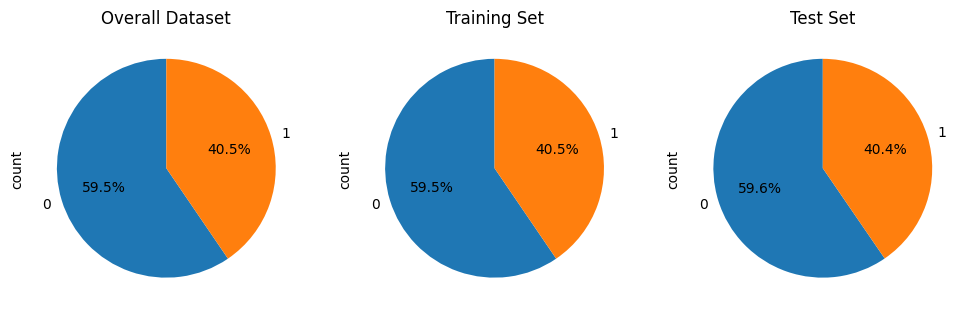

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

s_train = pd.DataFrame(y_train, columns=['Recommended'])
s_test = pd.DataFrame(y_test, columns=['Recommended'])

sorted_train = s_train['Recommended'].value_counts().sort_index()
sorted_test = s_test['Recommended'].value_counts().sort_index()
sorted_data = data['Recommended'].value_counts().sort_index()

# Create a pie chart for the overall dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 2)
plt.title('Training Set')
sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 3)
plt.title('Test Set')
sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 1)
plt.title('Overall Dataset')
sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

0         1         2         3         4         5         6    
0   1.000000 -0.103855  0.691058  0.683503  0.617292  0.838593  0.660847  \
1  -0.103855  1.000000 -0.060331 -0.053302 -0.068132 -0.101229 -0.006092   
2   0.691058 -0.060331  1.000000  0.590857  0.471207  0.682948  0.584616   
3   0.683503 -0.053302  0.590857  1.000000  0.466971  0.648526  0.667747   
4   0.617292 -0.068132  0.471207  0.466971  1.000000  0.593859  0.402526   
5   0.838593 -0.101229  0.682948  0.648526  0.593859  1.000000  0.650041   
6   0.660847 -0.006092  0.584616  0.667747  0.402526  0.650041  1.000000   
7   0.406044  0.041416  0.438662  0.370921  0.264553  0.406669  0.468660   
8   0.236587  0.074549  0.234867  0.217016  0.228270  0.224997  0.254206   
9  -0.175389  0.087763 -0.127133 -0.126960 -0.128647 -0.181438 -0.152181   
10 -0.033314  0.043207 -0.044172 -0.012914  0.009622 -0.051197 -0.019441   
11 -0.047849  0.079332 -0.020995 -0.012849 -0.023913 -0.040286 -0.013751   
12  0.040058  0.144920  0.050791  0.037483  0.058892  0.044672  0.044426   
13  0.194980 -0.343247  0.129575  0.103285  0.066265  0.209384  0.127368   
14  0.084078  0.018330  0.022465  0.100233  0.063373  0.042043  0.102381   
15 -0.133905  0.020554 -0.112820 -0.135080 -0.094891 -0.065040 -0.133158   
16  0.108084 -0.041126  0.142181  0.116777  0.040448  0.064390  0.091561   
17  0.010532 -0.030048  0.046856 -0.020586  0.029758 -0.004317 -0.006931   
18 -0.016884 -0.016567 -0.034279 -0.004134 -0.015776 -0.028182 -0.013400   

          7         8         9         10        11        12        13   
0   0.406044  0.236587 -0.175389 -0.033314 -0.047849  0.040058  0.194980  \
1   0.041416  0.074549  0.087763  0.043207  0.079332  0.144920 -0.343247   
2   0.438662  0.234867 -0.127133 -0.044172 -0.020995  0.050791  0.129575   
3   0.370921  0.217016 -0.126960 -0.012914 -0.012849  0.037483  0.103285   
4   0.264553  0.228270 -0.128647  0.009622 -0.023913  0.058892  0.066265   
5   0.406669  0.224997 -0.181438 -0.051197 -0.040286  0.044672  0.209384   
6   0.468660  0.254206 -0.152181 -0.019441 -0.013751  0.044426  0.127368   
7   1.000000  0.322013 -0.079769  0.037175 -0.002547  0.070817 -0.038477   
8   0.322013  1.000000 -0.040276  0.003721  0.017610  0.009135  0.010541   
9  -0.079769 -0.040276  1.000000 -0.276458 -0.161474 -0.261727 -0.236656   
10  0.037175  0.003721 -0.276458  1.000000 -0.209468 -0.339520 -0.306997   
11 -0.002547  0.017610 -0.161474 -0.209468  1.000000 -0.198306 -0.179311   
12  0.070817  0.009135 -0.261727 -0.339520 -0.198306  1.000000 -0.290639   
13 -0.038477  0.010541 -0.236656 -0.306997 -0.179311 -0.290639  1.000000   
14  0.012846  0.037328  0.112941  0.039811 -0.077872 -0.149118  0.068283   
15 -0.051658 -0.057552 -0.101160 -0.043411  0.108242  0.144720 -0.094083   
16  0.062554  0.002665  0.010793  0.007809 -0.035093 -0.031881  0.042040   
17  0.018572  0.035852 -0.014887  0.005532 -0.031544  0.014601  0.016733   
18 -0.005504  0.000504 -0.011317 -0.014681 -0.008575  0.014671  0.017627   

          14        15        16        17        18  
0   0.084078 -0.133905  0.108084  0.010532 -0.016884  
1   0.018330  0.020554 -0.041126 -0.030048 -0.016567  
2   0.022465 -0.112820  0.142181  0.046856 -0.034279  
3   0.100233 -0.135080  0.116777 -0.020586 -0.004134  
4   0.063373 -0.094891  0.040448  0.029758 -0.015776  
5   0.042043 -0.065040  0.064390 -0.004317 -0.028182  
6   0.102381 -0.133158  0.091561 -0.006931 -0.013400  
7   0.012846 -0.051658  0.062554  0.018572 -0.005504  
8   0.037328 -0.057552  0.002665  0.035852  0.000504  
9   0.112941 -0.101160  0.010793 -0.014887 -0.011317  
10  0.039811 -0.043411  0.007809  0.005532 -0.014681  
11 -0.077872  0.108242 -0.035093 -0.031544 -0.008575  
12 -0.149118  0.144720 -0.031881  0.014601  0.014671  
13  0.068283 -0.094083  0.042040  0.016733  0.017627  
14  1.000000 -0.721166 -0.167952 -0.227598 -0.016880  
15 -0.721166  1.000000 -0.255474 -0.346203 -0.025676  
16 -0.167952 -0.255474  1.000000 

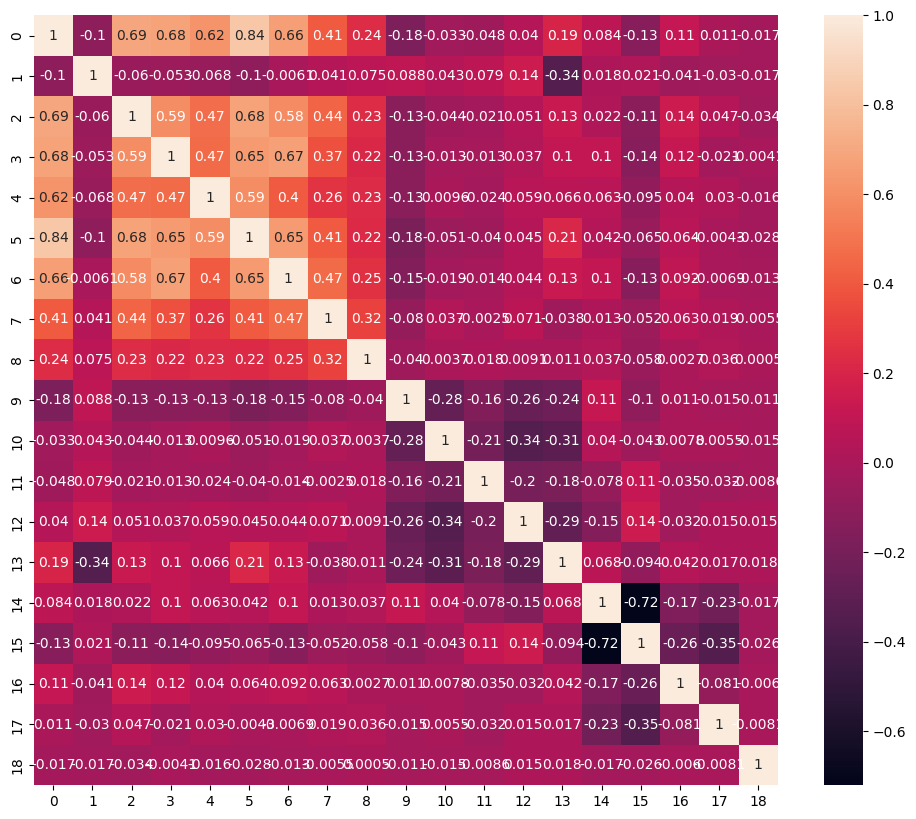

In [12]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

correlation_matrix = pd.DataFrame(x_train).corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True ,ax=ax)
correlation_matrix

In [13]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = pd.DataFrame(dataset, columns=col).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)

[]


# Developing model

**Devault Model**

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error


mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=100, activation='relu', solver='adam', random_state=42, learning_rate_init=0.0001, learning_rate='constant')
mlp.fit(x_train, y_train)
predict = mlp.predict(x_test)

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
def plot_cm(matrix, title, directory): 
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix\n{title}', pad=10);
    plt.savefig(f'{directory}/Confusion Matrix {title}.jpg', transparent=False, dpi=100,bbox_inches='tight')
    plt.show()

In [21]:
from pandas.plotting import table as pd_table  # Rename the table module to avoid conflicts

def report_maker(model_report, mse, title, directory):
    fig, ax = plt.subplots(figsize=(6, 4))  
    ax.xaxis.set_visible(False)  
    ax.yaxis.set_visible(False)  
    ax.set_frame_on(False)

    red_color = '#ADD8E6'  
    cell_colors = [['#f2f2f2']*len(model_report.columns)]*len(model_report)
    cell_colors[2] = [red_color]*len(model_report.columns)

    tabla = pd_table(ax, model_report, loc='upper right', colWidths=[0.17]*len(model_report.columns), cellColours=cell_colors)  
    tabla.auto_set_font_size(False) 
    tabla.set_fontsize(12) 
    tabla.scale(1.2, 1.2) 

    mse_text = f'Mean Squared Error: {mse:.3f}'
    plt.text(0.5, -0.05, mse_text, ha='center', va='center', transform=ax.transAxes, fontsize=12)

    plt.savefig(f'{directory}/Report {title}.jpg', transparent=False, dpi=150)
    plt.show()

**Best Model**

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


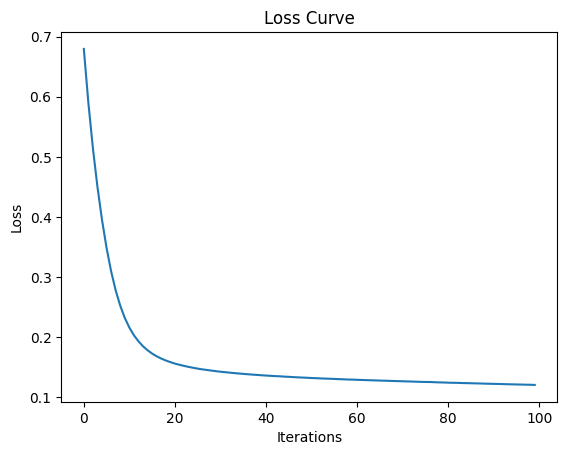

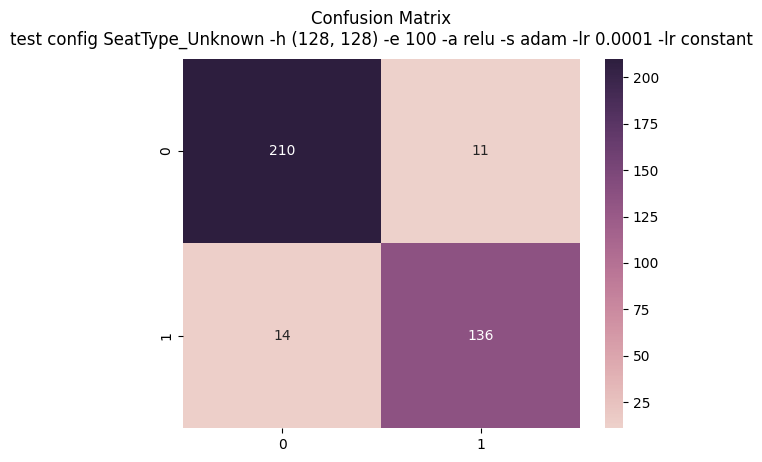

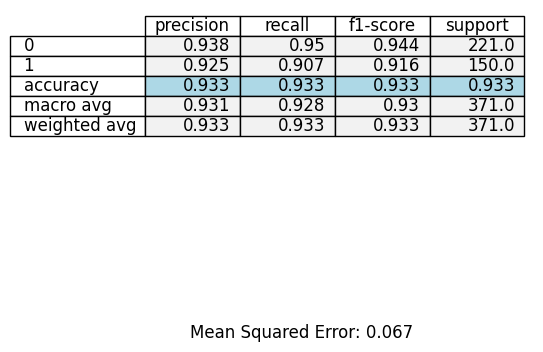

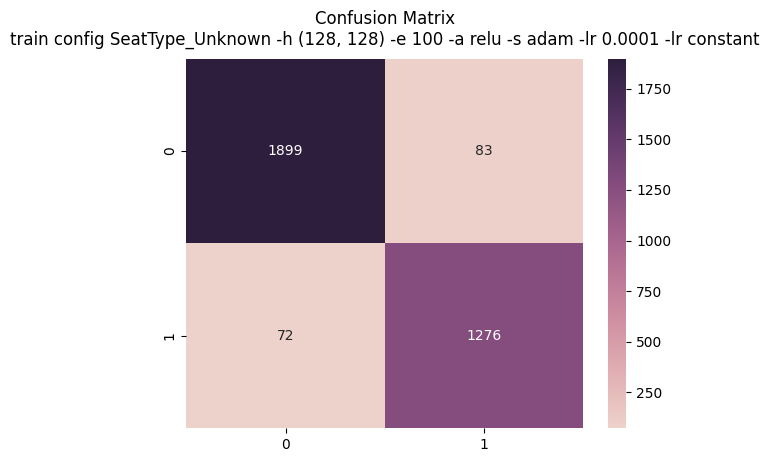

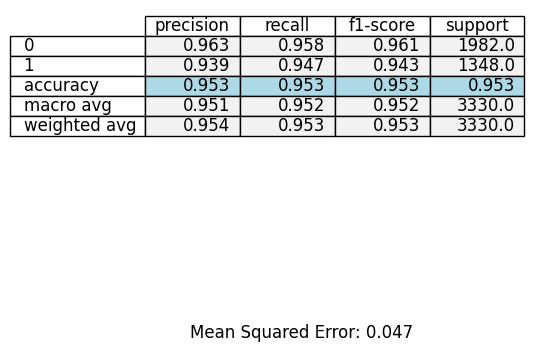

In [22]:
# split configuration
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=42, stratify=label)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

correlation_matrix = pd.DataFrame(x_train).corr()

upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)

# model
hidden_layer = (128,128)
max_iter = 100
activation = 'relu'
solver = 'adam'
random_state = 42
learning_rate_init = 0.0001
learning_rate = 'constant'
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, max_iter=max_iter, activation=activation, solver=solver, random_state=random_state, learning_rate_init=learning_rate_init, learning_rate=learning_rate)
mlp.fit(x_train, y_train)

accuracy = mlp.score(x_test, y_test)

plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# confusion matrix
predict = mlp.predict(x_test)
confussion_matrix = confusion_matrix(y_test, predict)
plot_cm(confussion_matrix, f'test config {i} -h {hidden_layer} -e {max_iter} -a {activation} -s {solver} -lr {learning_rate_init} -lr {learning_rate}', 'best-model')

model1_report = classification_report(y_test, predict, output_dict=True)
report1 = pd.DataFrame(model1_report).transpose()
report1 = report1.round(3)
mse_value1 = mean_squared_error(y_test, predict)
report_maker(report1, mse_value1, f'test config {i} -h {hidden_layer} -e {max_iter} -a {activation} -s {solver} -lr {learning_rate_init} -lr {learning_rate}', 'best-model')


predict = mlp.predict(x_train)
confusion_matrix_result = confusion_matrix(y_train, predict)
plot_cm(confusion_matrix_result, f'train config {i} -h {hidden_layer} -e {max_iter} -a {activation} -s {solver} -lr {learning_rate_init} -lr {learning_rate}', 'best-model')

model_report = classification_report(y_train, predict, output_dict=True)
report = pd.DataFrame(model_report).transpose()
report = report.round(3)
mse_value = mean_squared_error(y_train, predict)
report_maker(report, mse_value, f'train config {i} -h {hidden_layer} -e {max_iter} -a {activation} -s {solver} -lr {learning_rate_init} -lr {learning_rate}', 'best-model')

# Split Configuration

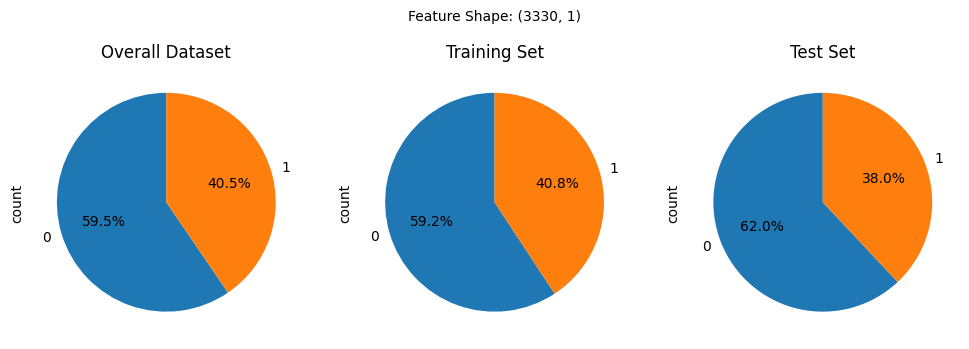

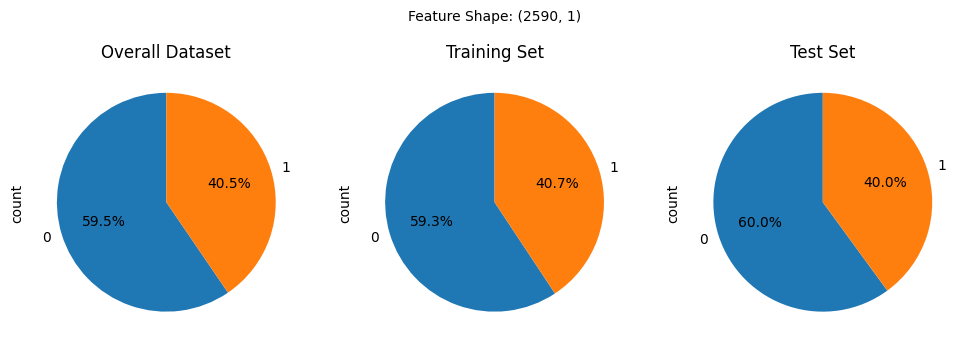

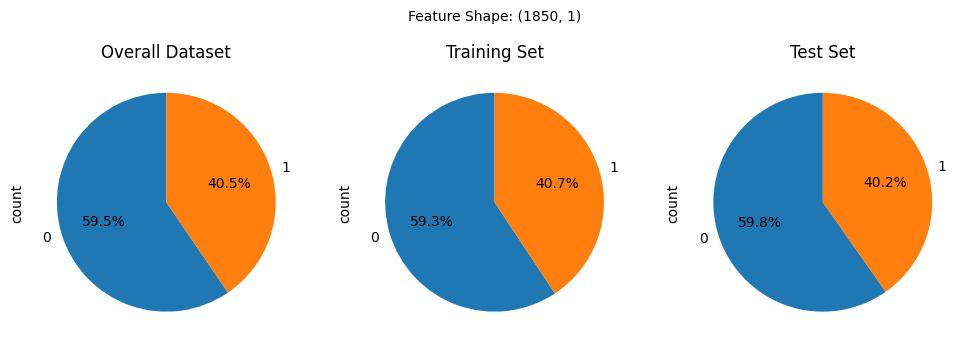

In [23]:
config = [0.1, 0.3, 0.5]

for i in config:
    x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=i, random_state=42)
    s_train = pd.DataFrame(y_train, columns=['Recommended'])
    s_test = pd.DataFrame(y_test, columns=['Recommended'])

    sorted_train = s_train['Recommended'].value_counts().sort_index()
    sorted_test = s_test['Recommended'].value_counts().sort_index()
    sorted_data = data['Recommended'].value_counts().sort_index()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 2)
    plt.title('Training Set')
    plt.text(0, 1.7, f'Feature Shape: {s_train.shape}', horizontalalignment='center', verticalalignment='center')
    sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 3)
    plt.title('Test Set')
    sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.subplot(1, 3, 1)
    plt.title('Overall Dataset')
    sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

    plt.show()

# Experiment

In [ ]:
import os

main_dir = os.getcwd()
cm_dir = os.path.join(main_dir, 'confusion-matrix-jpeg')
report_dir = os.path.join(main_dir, 'report-jpeg')

### Epochs

In [ ]:
epoch_dir = 'epoch'

cm_epoch_dir = os.path.join(cm_dir, epoch_dir)
if not os.path.exists(cm_epoch_dir):
    os.makedirs(cm_epoch_dir)

report_epoch_dir = os.path.join(report_dir, epoch_dir)
if not os.path.exists(report_epoch_dir):
    os.makedirs(report_epoch_dir)

cmdir = os.path.relpath(cm_epoch_dir, start=main_dir)
cmdir = cmdir.replace(os.path.sep, '/')

rpdir = os.path.relpath(report_epoch_dir, start=main_dir)
rpdir = rpdir.replace(os.path.sep, '/')
    

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


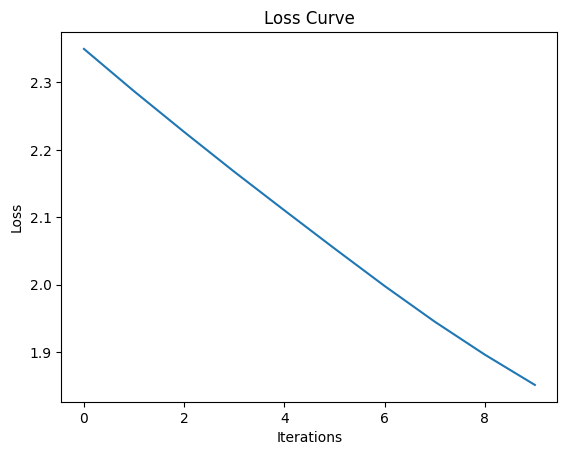

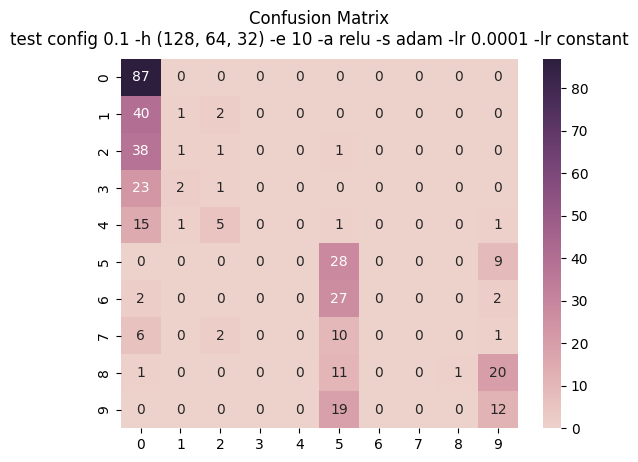

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


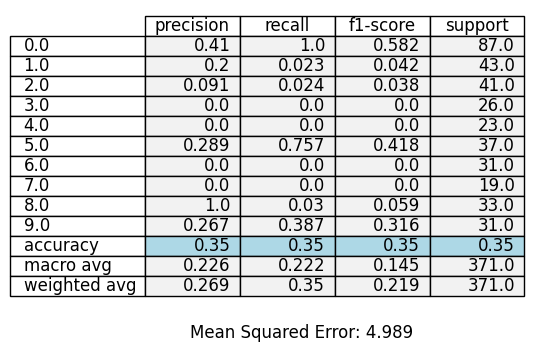

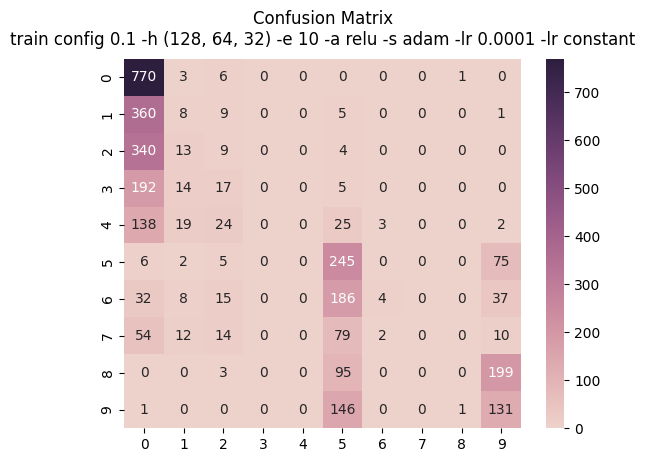

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


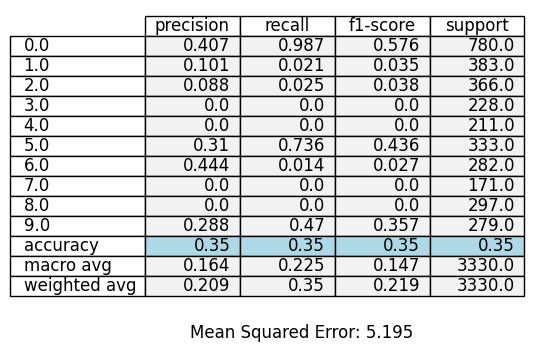

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


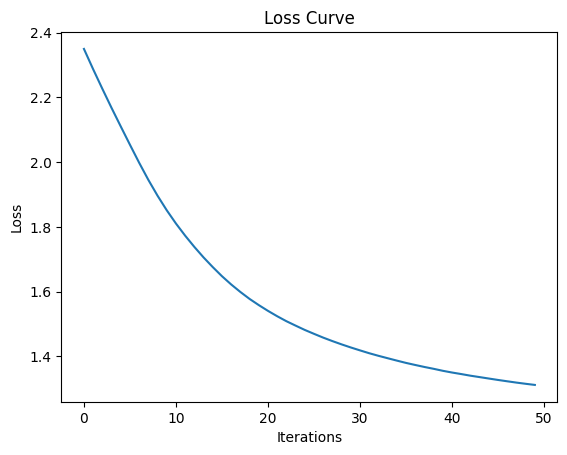

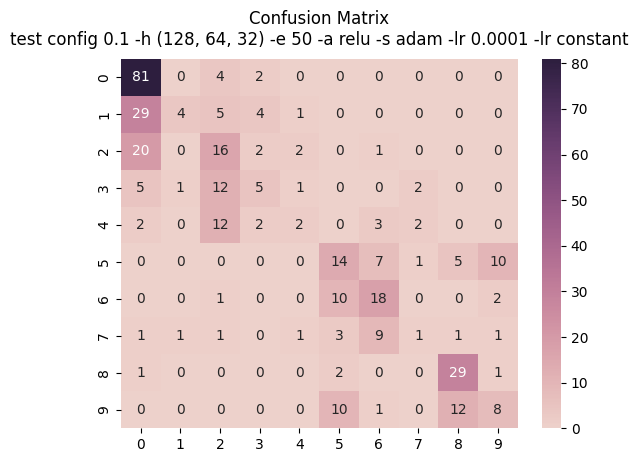

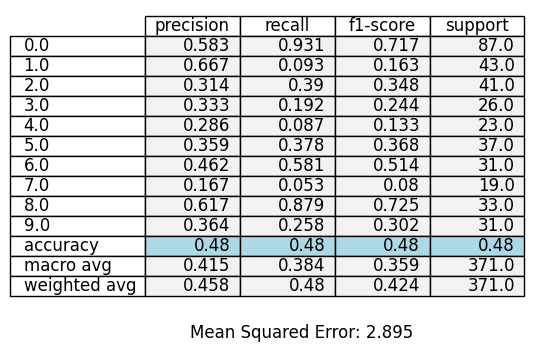

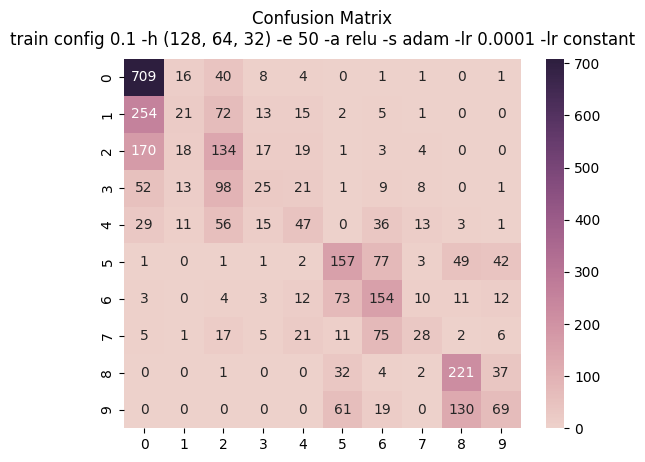

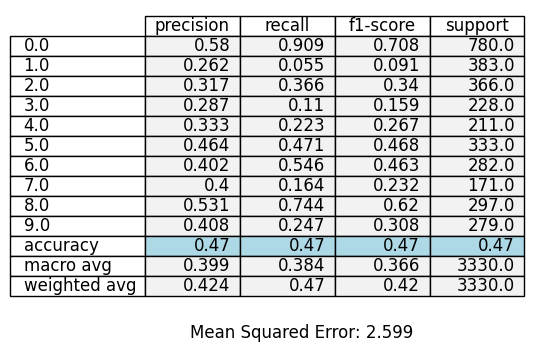

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


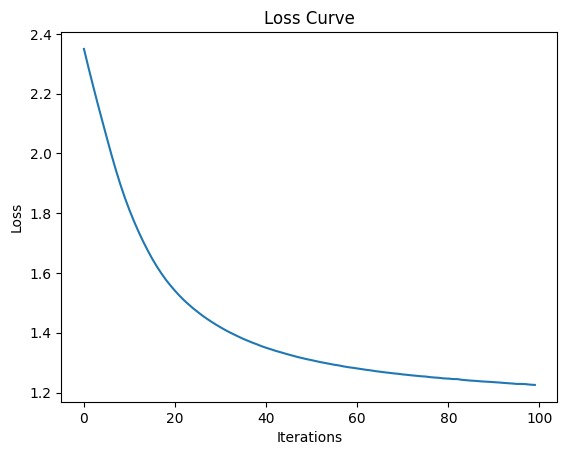

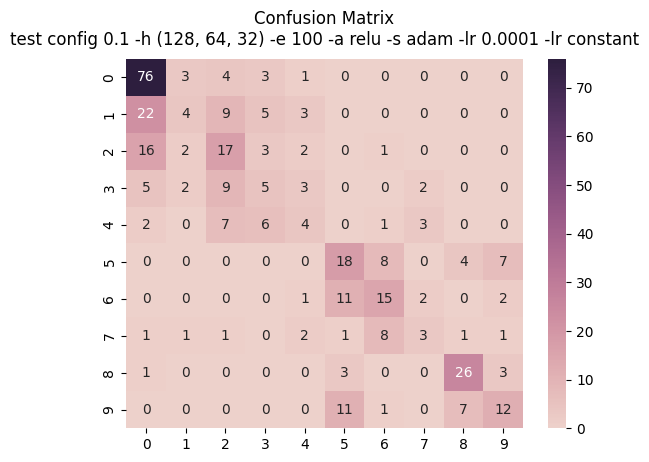

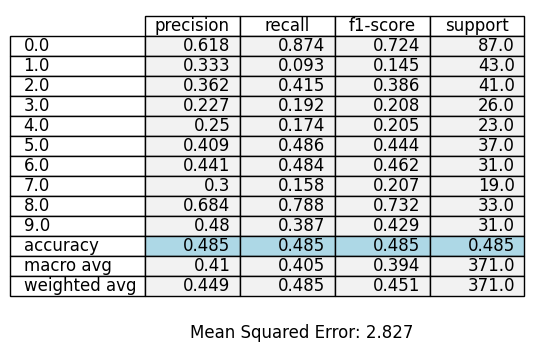

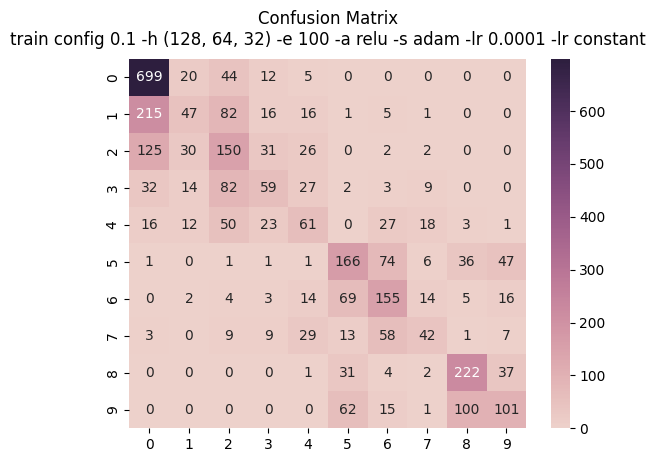

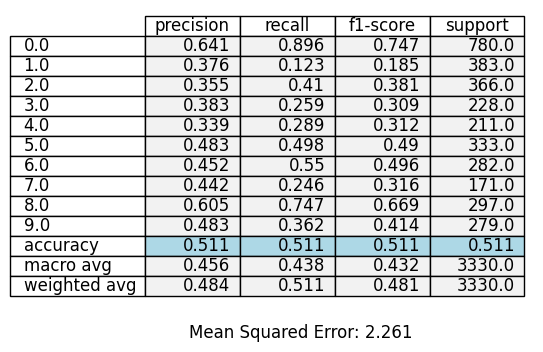

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


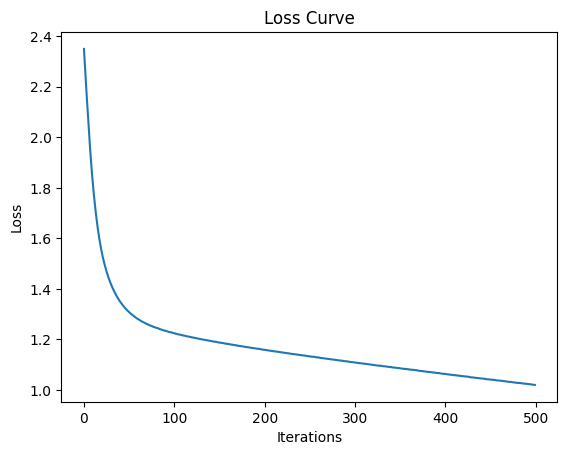

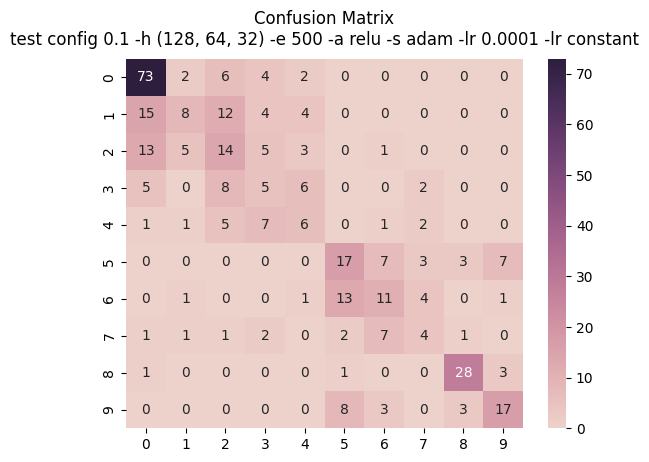

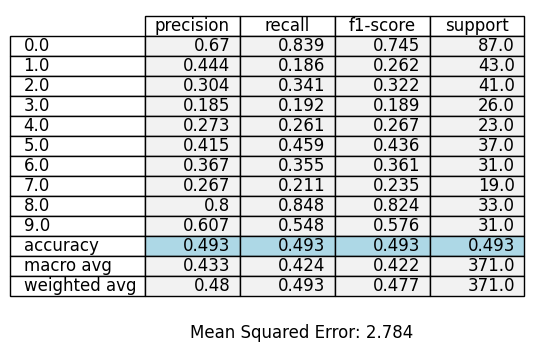

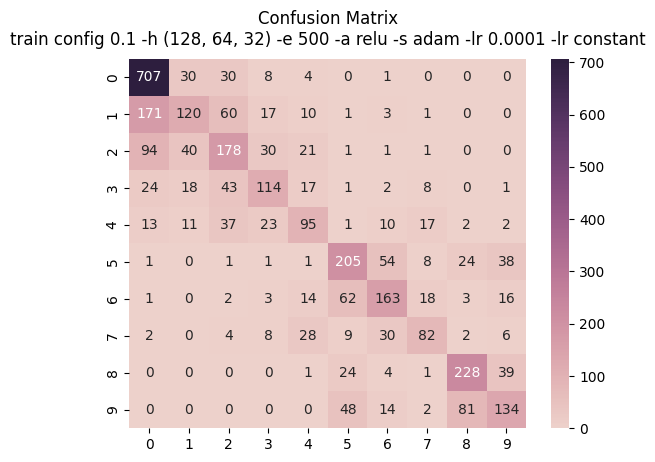

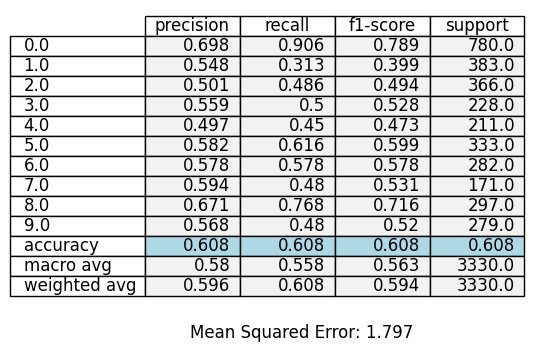

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


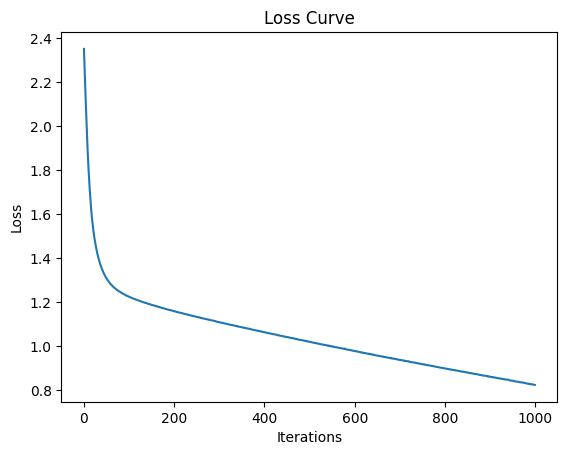

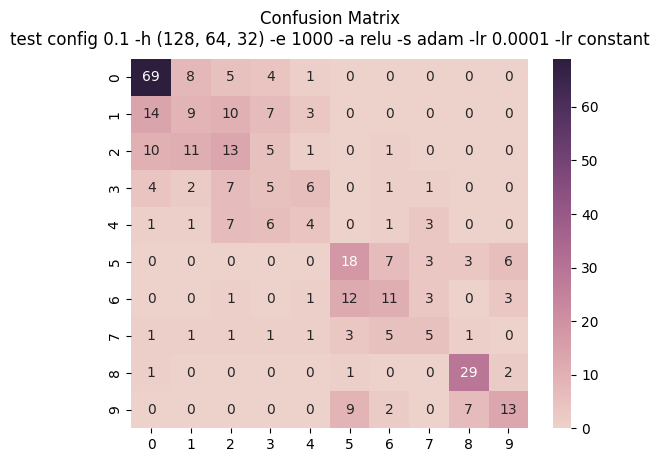

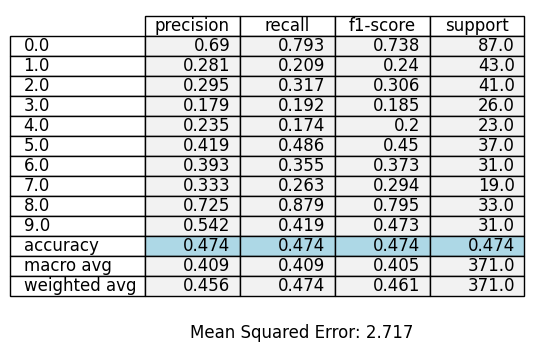

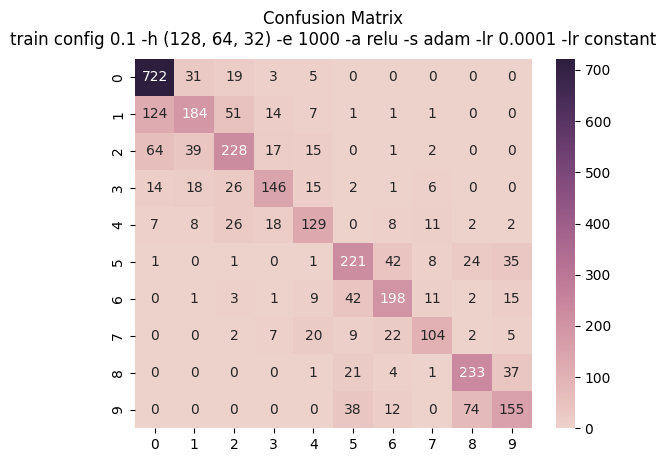

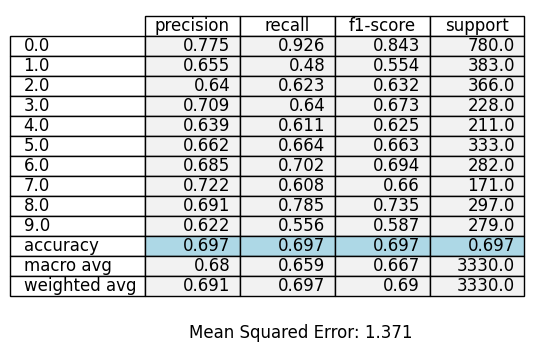

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


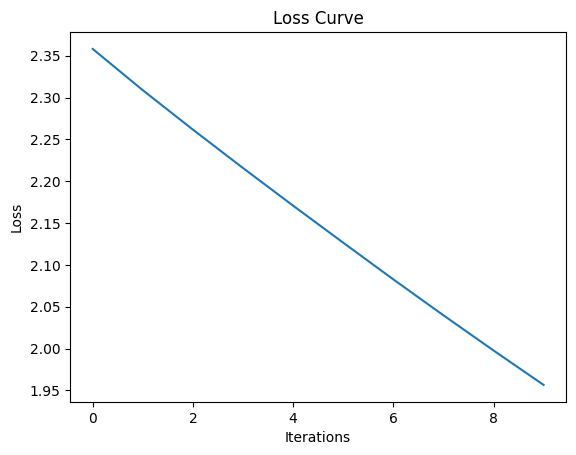

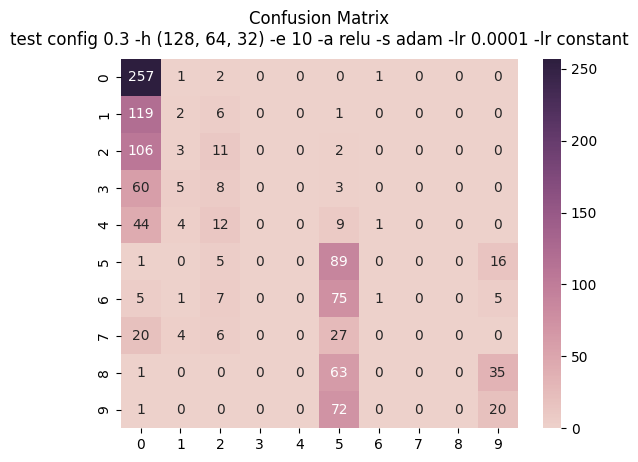

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


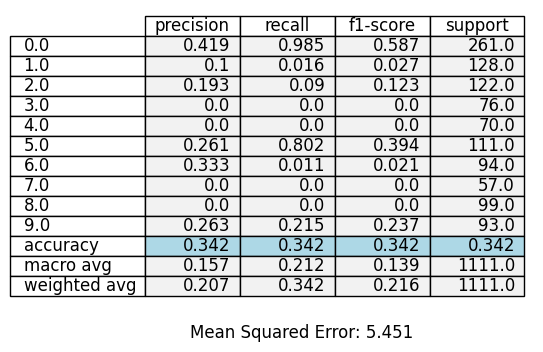

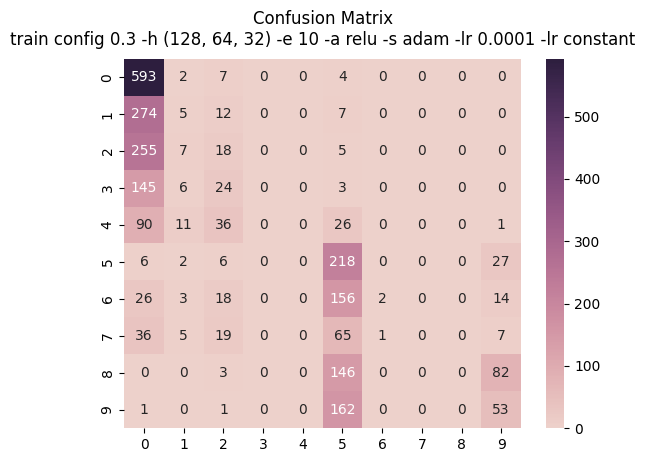

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


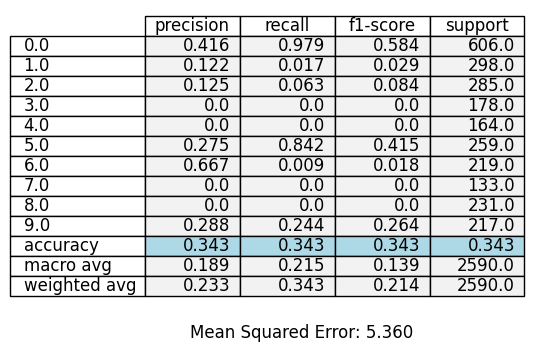

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


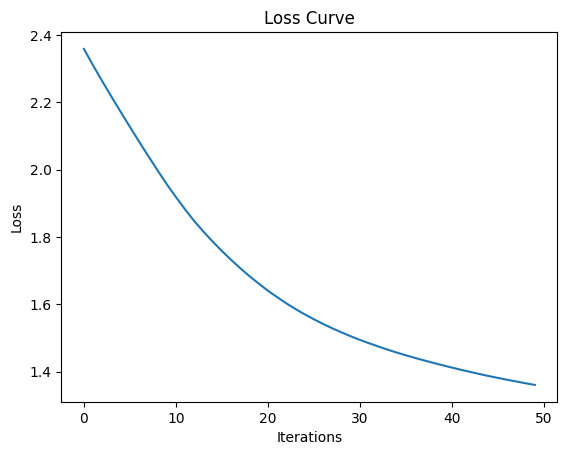

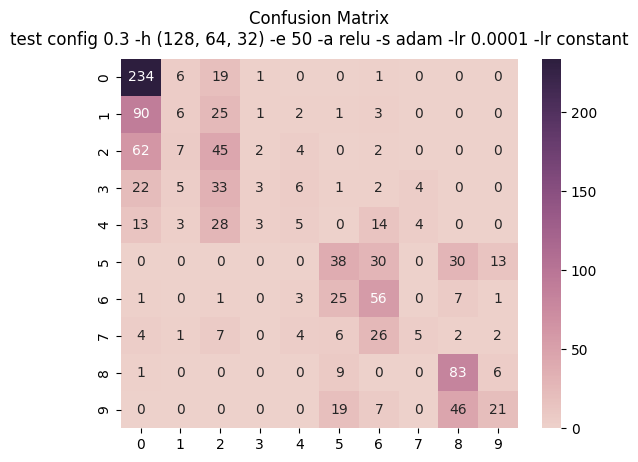

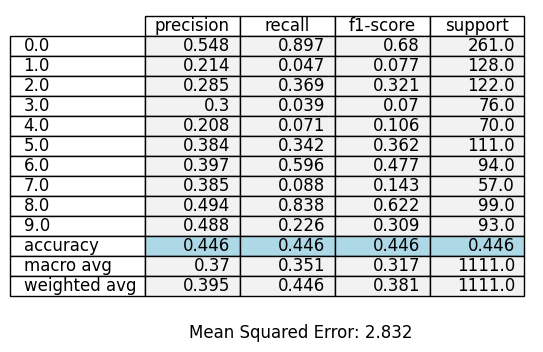

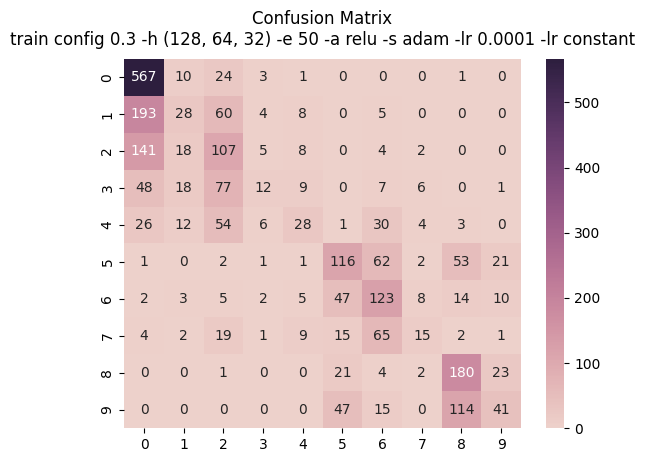

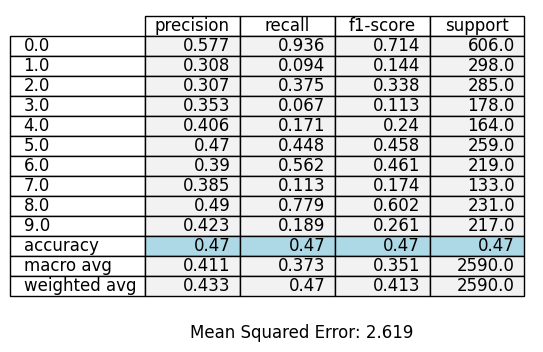

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


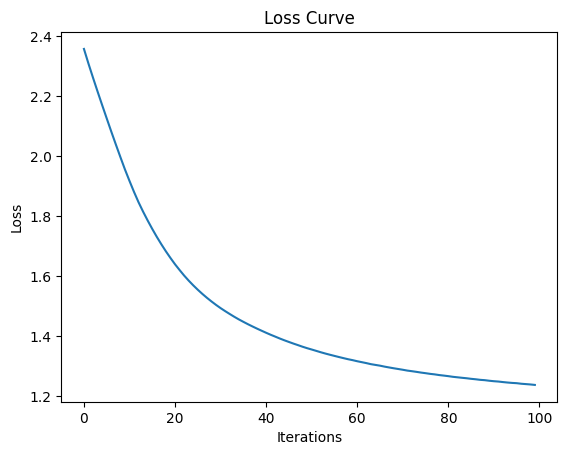

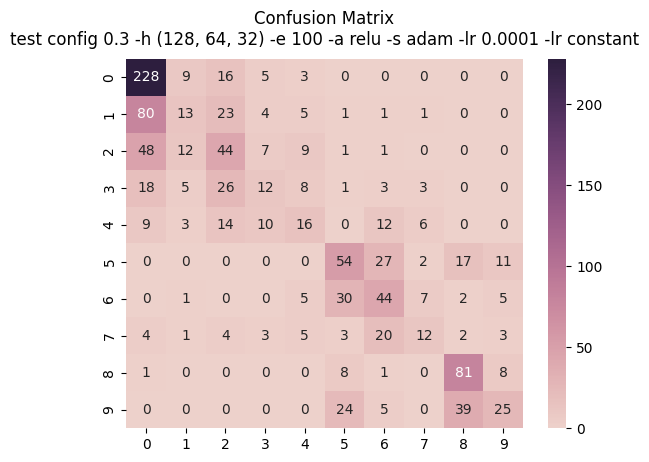

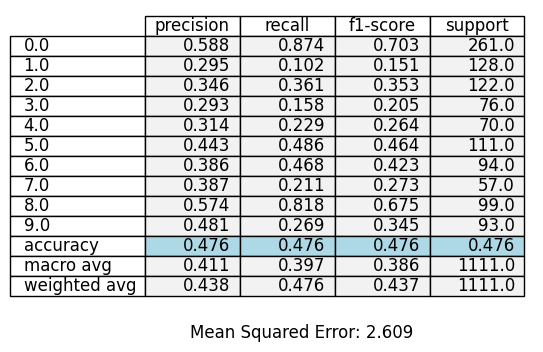

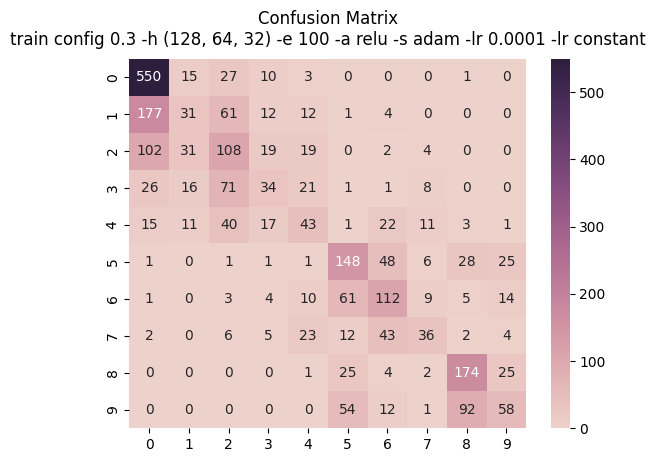

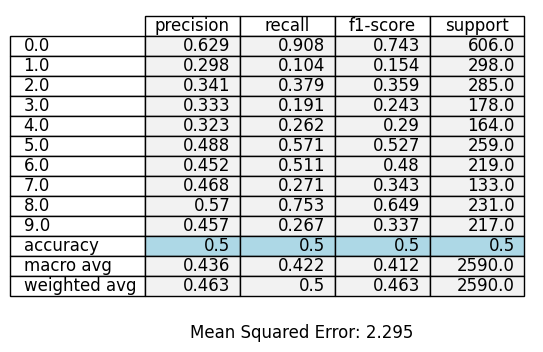

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


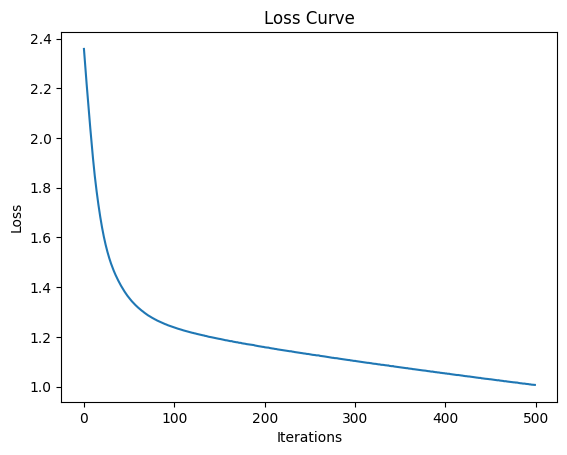

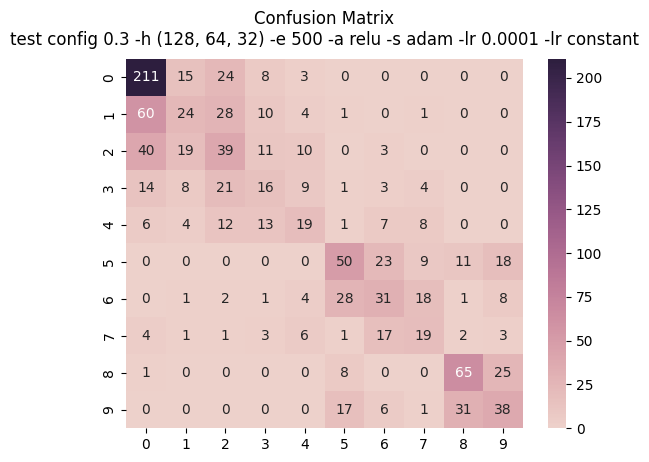

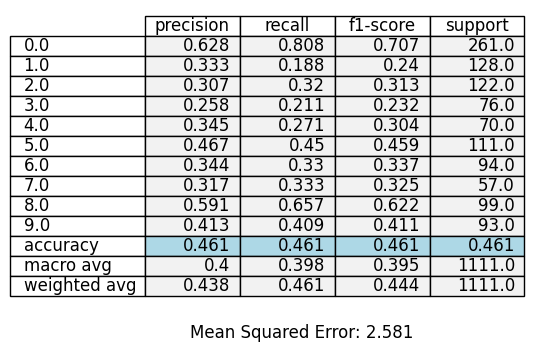

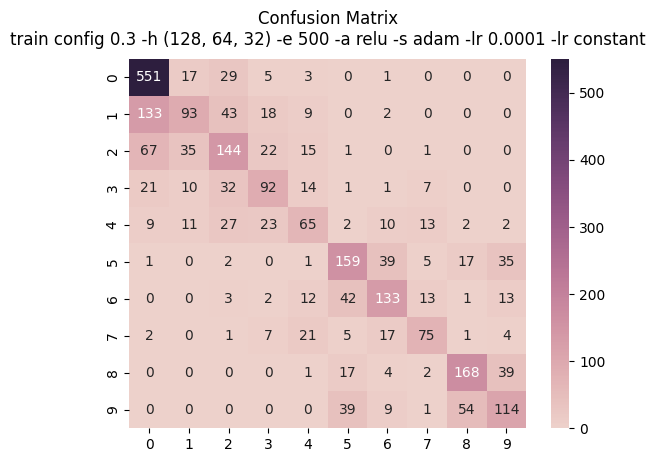

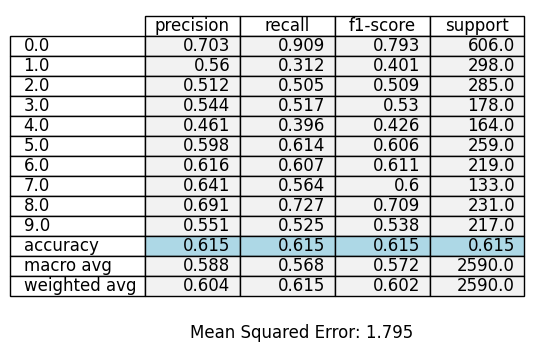

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


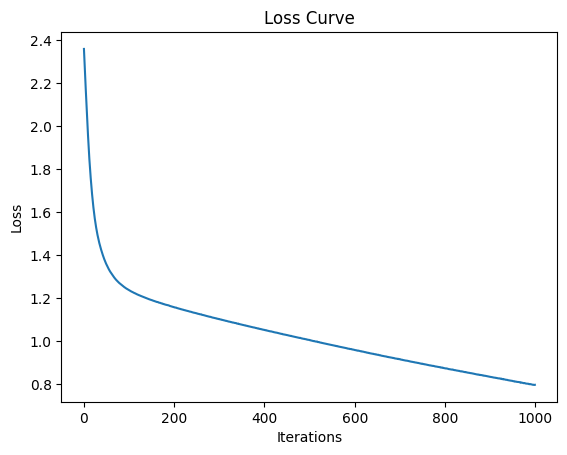

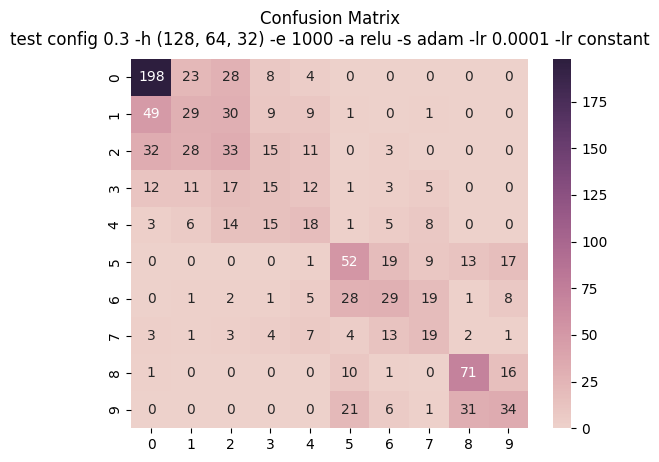

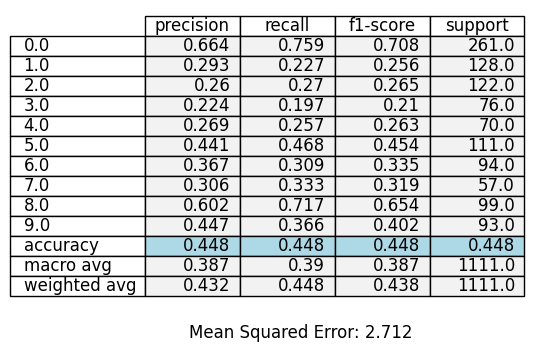

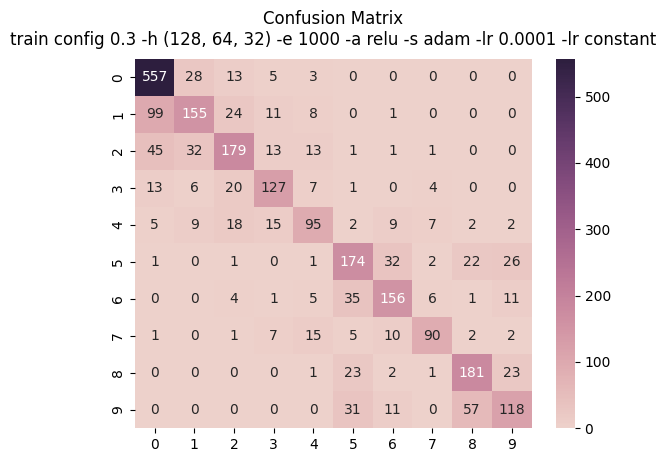

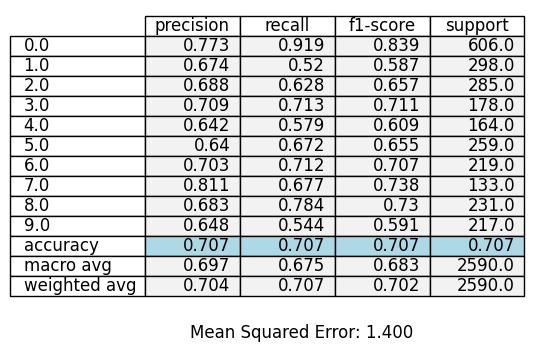

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


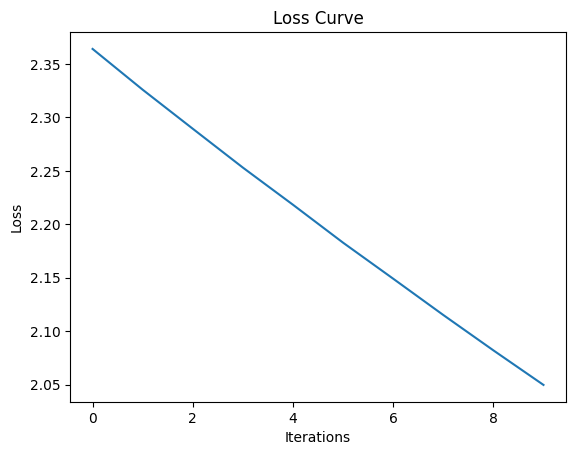

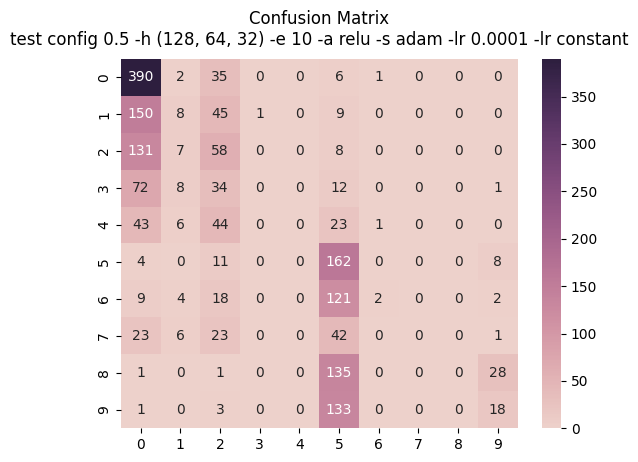

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


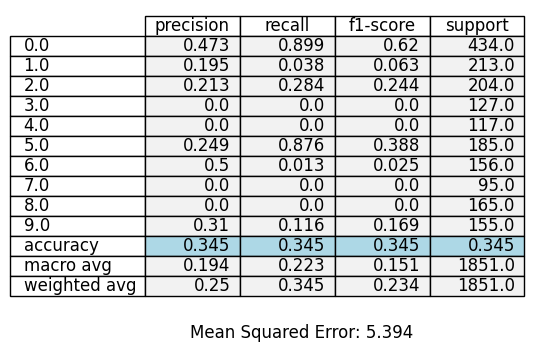

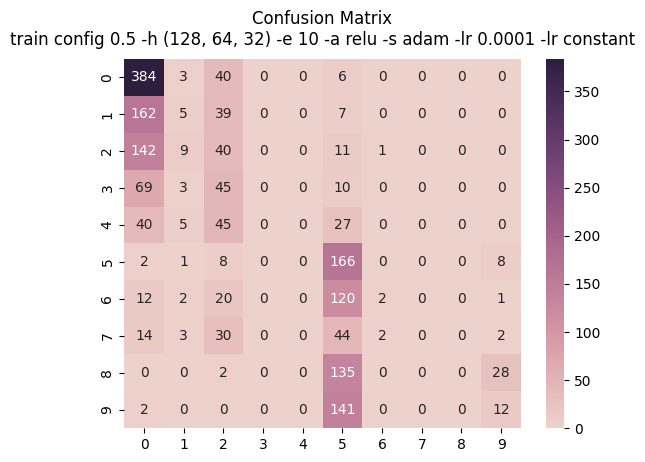

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


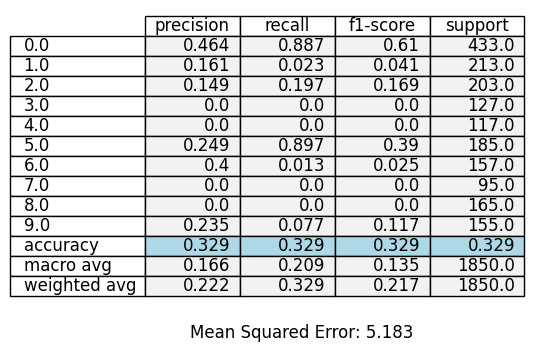

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


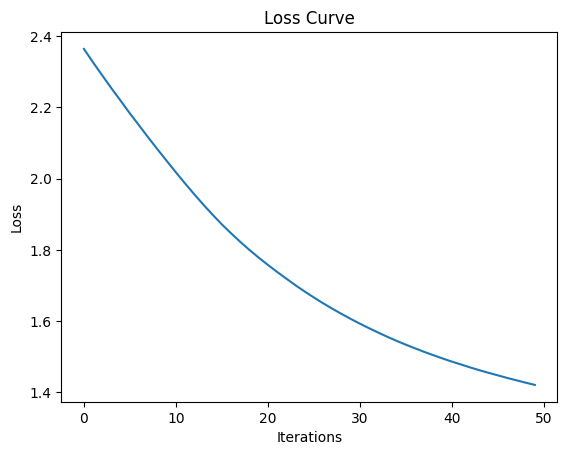

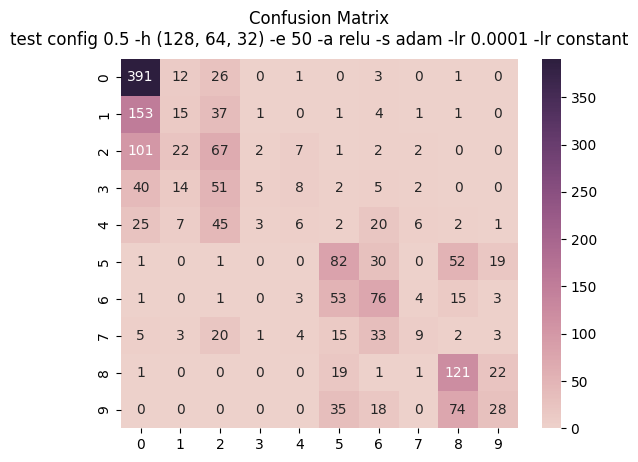

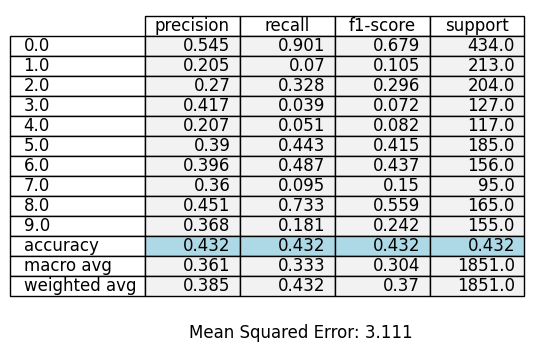

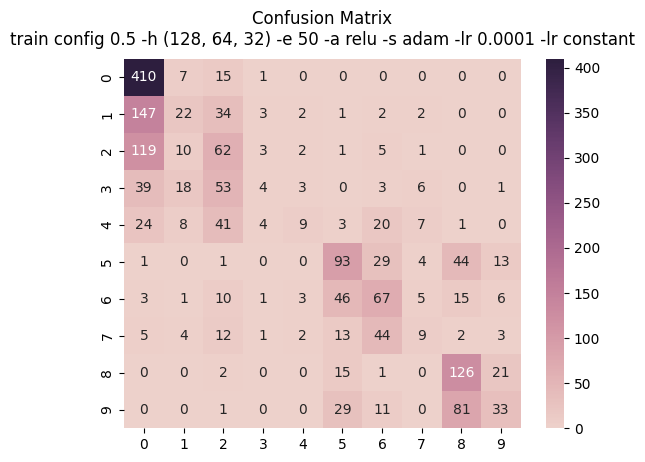

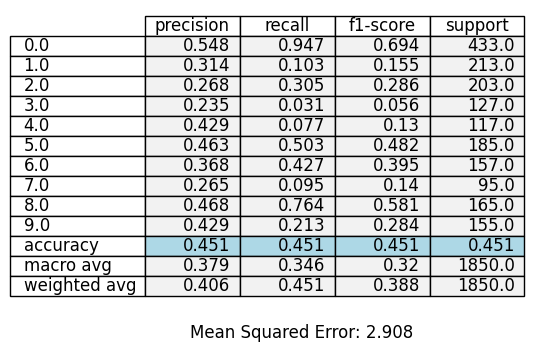

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


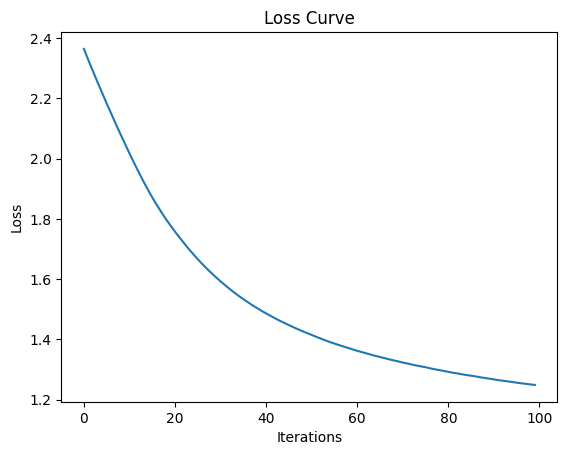

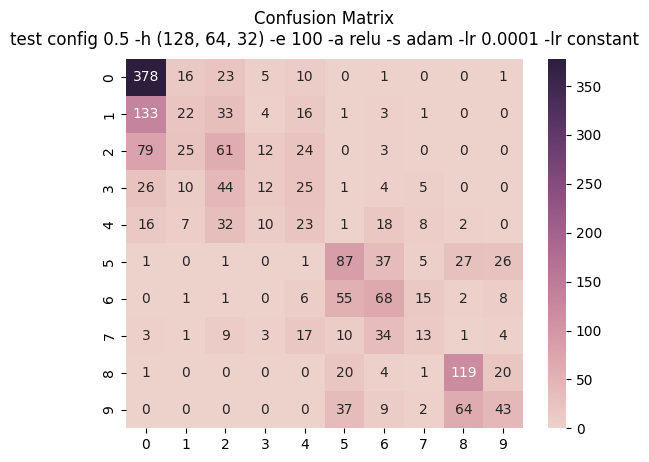

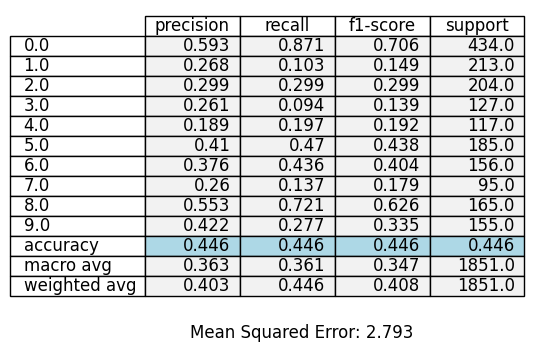

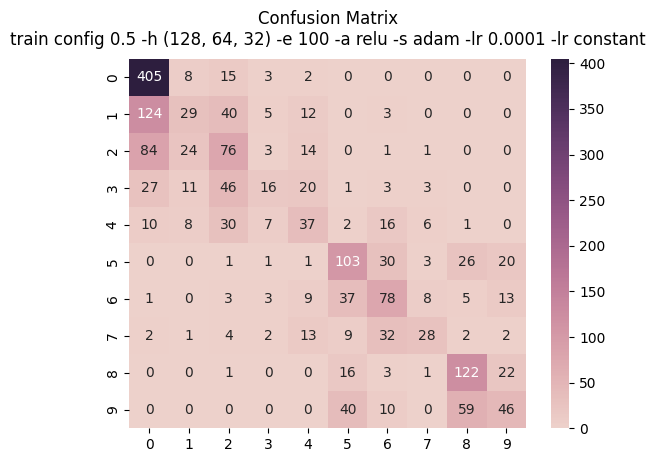

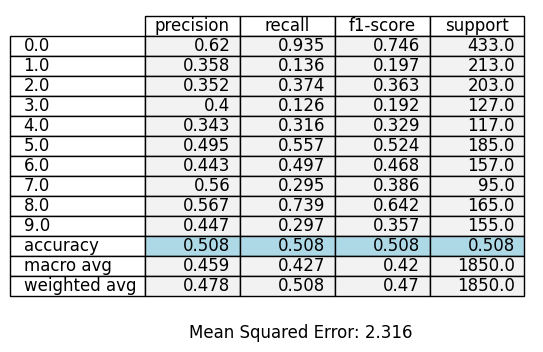

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


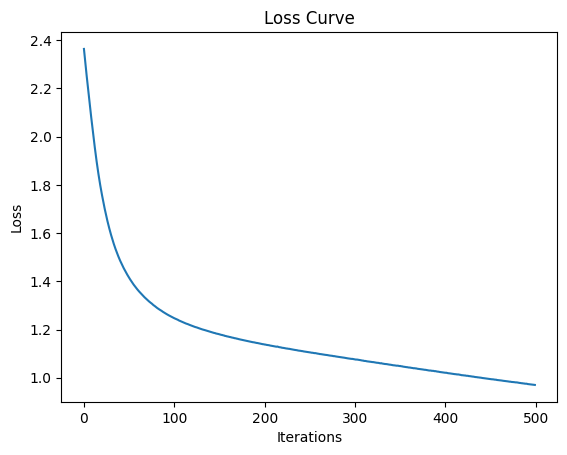

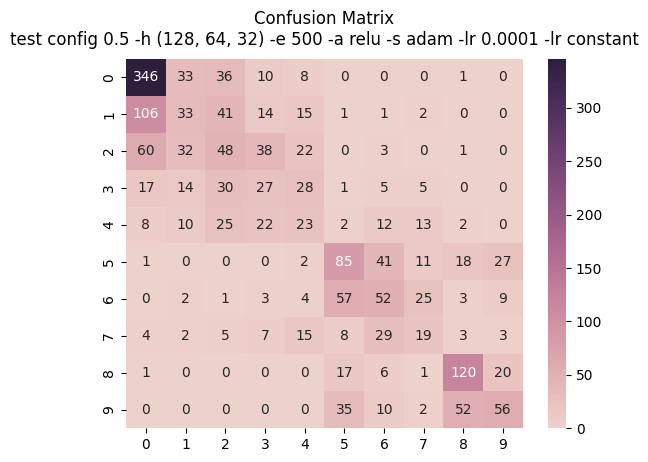

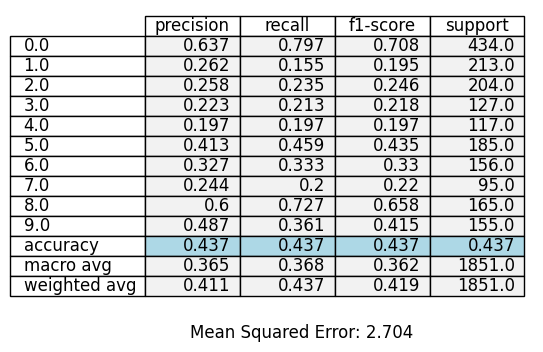

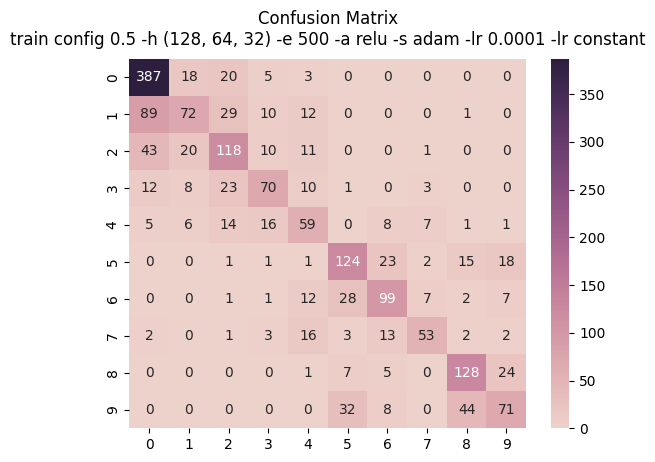

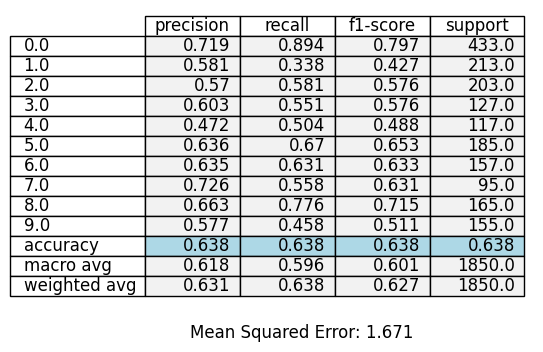

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


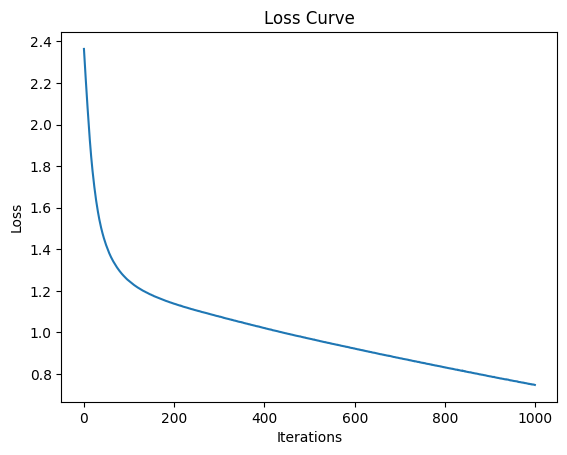

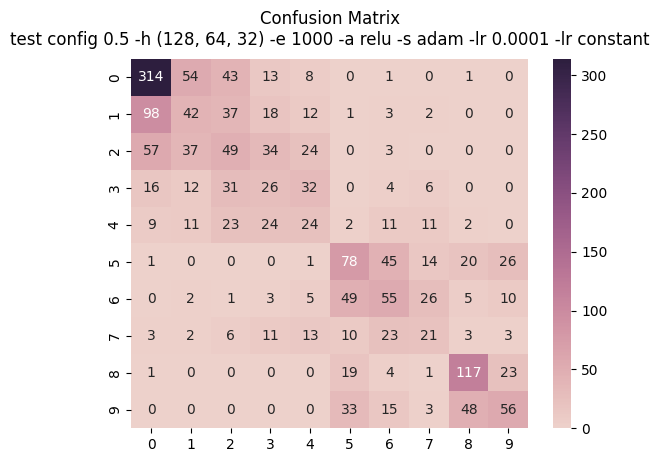

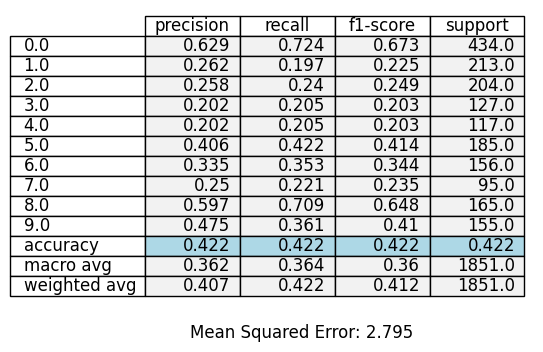

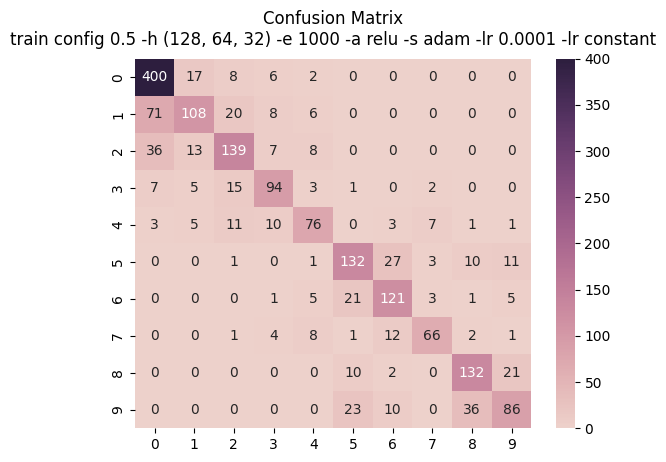

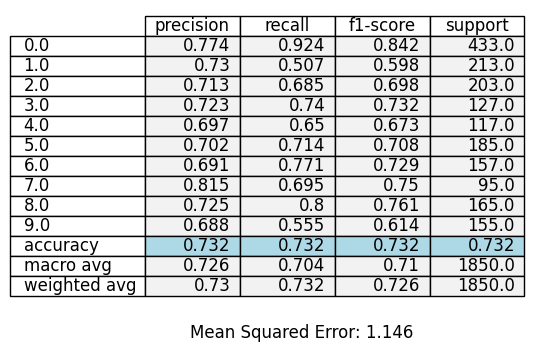

In [ ]:
best_accuracy = 0
best_config = None

config = [0.1, 0.3, 0.5]
epoch = [10, 50, 100, 500, 1000]

for i in config:
    x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=i, random_state=42, stratify=label)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)

    correlation_matrix = pd.DataFrame(x_train).corr()

    upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

    x_train = x_train.drop(x_train.columns[to_drop], axis=1)
    x_test = x_test.drop(x_test.columns[to_drop], axis=1)

    for j in epoch:
        #! edit mulai disini
        hidden_layer = (128,64,32)
        max_iter = j
        activation = 'relu'
        solver = 'adam'
        random_state = 42
        learning_rate_init = 0.0001
        learning_rate = 'constant'
        mlp = MLPClassifier(hidden_layer_sizes=hidden_layer, max_iter=max_iter, activation=activation, solver=solver, random_state=random_state, learning_rate_init=learning_rate_init, learning_rate=learning_rate)
        mlp.fit(x_train, y_train)

        accuracy = mlp.score(x_test, y_test)

        # Check if the current accuracy is the best
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_config = {
                'config': i,
                'epoch': j,
                'hidden_layer': hidden_layer,
                'activation': activation,
                'solver': solver,
                'learning_rate_init': learning_rate_init,
                'learning_rate': learning_rate
            }
        #! sampe sini

        plt.plot(mlp.loss_curve_)
        plt.title('Loss Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.show()

        predict = mlp.predict(x_test)
        confussion_matrix = confusion_matrix(y_test, predict)
        plot_cm(confussion_matrix, f'test config {i} -h {hidden_layer} -e {max_iter} -a {activation} -s {solver} -lr {learning_rate_init} -lr {learning_rate}', cmdir)

        model1_report = classification_report(y_test, predict, output_dict=True)
        report1 = pd.DataFrame(model1_report).transpose()
        report1 = report1.round(3)
        mse_value1 = mean_squared_error(y_test, predict)
        report_maker(report1, mse_value1, f'test config {i} -h {hidden_layer} -e {max_iter} -a {activation} -s {solver} -lr {learning_rate_init} -lr {learning_rate}', rpdir)


        predict = mlp.predict(x_train)
        confusion_matrix_result = confusion_matrix(y_train, predict)
        plot_cm(confusion_matrix_result, f'train config {i} -h {hidden_layer} -e {max_iter} -a {activation} -s {solver} -lr {learning_rate_init} -lr {learning_rate}', cmdir)

        model_report = classification_report(y_train, predict, output_dict=True)
        report = pd.DataFrame(model_report).transpose()
        report = report.round(3)
        mse_value = mean_squared_error(y_train, predict)
        report_maker(report, mse_value, f'train config {i} -h {hidden_layer} -e {max_iter} -a {activation} -s {solver} -lr {learning_rate_init} -lr {learning_rate}', rpdir)

In [ ]:
best_accuracy, best_config

(0.49326145552560646,
 {'config': 0.1,
  'epoch': 500,
  'hidden_layer': (128, 64, 32),
  'activation': 'relu',
  'solver': 'adam',
  'learning_rate_init': 0.0001,
  'learning_rate': 'constant'})